# Problem 8.1

#### Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.linalg as la
from IPython.display import Image

#### The model equations are:

$$
m \frac{d v}{d t} = F_{k_1} - F_{k_2} + F_{in} \\
\frac{1}{k_1} \frac{d F_{k_1}}{d t} = 0 - v \\
\frac{1}{k_2} \frac{d F_{k_2}}{d t} = v - 0 \\
$$
The last two equations can be combined to:
$$
\frac{d (F_{k_1}-F_{k_2})}{d t} = -k_1 v - k_2 v
$$
Introducing the new variable $F_k \equiv F_{k_1} - F_{k_2}$ the equations become:
$$
m \frac{d v}{d t} = F_{k} + F_{in} \\
\frac{1}{k_1 + k_2} \frac{d F_{k}}{d t} = - v
$$

Setting the parameter values

In [2]:
m = 1.      # [kg]
k1 = 500.   # [N/m]
k2 = 500.   # [N/m]
Fi = 50.    # [N]

#### Create the State-Space Model

Define the state vector
$$
q = \left(
\begin{matrix}
v \\ F_k 
\end{matrix}
\right)
$$

The matrisces are given by:
$$
\mathbb{A} = \left(
\begin{matrix}
0 & \frac{1}{m} \\
-(k_1 + k_2) & 0 
\end{matrix}
\right),
\;
\mathbb{B} = \left(
\begin{matrix}
\frac{1}{m} \\ 0 
\end{matrix}
\right),
\;
\mathbb{C} = \left(
\begin{matrix}
0 & -\frac{1}{k_1+k_2} 
\end{matrix}
\right),
\;
\mathbb{D} = \left(
\begin{matrix}
0 
\end{matrix}
\right).
$$

Calculate the initial discplacement; static situation so time-derivatives are zero:

In [56]:
xini = Fi/ (k1+k2)
print(f'The initial displacement is x1 = {xini:.{5}} [m].')

The initial displacement is x1 = 0.05 [m].


#### Create the State-Space Model in Python

In [43]:
aa = np.array([[0, 1./m],
[-(k2+k1),0]])
bb = np.array([[1./m], [0.]])
cc = np.array([[0., -1./(k1+k2)]])
dd = np.array([[0.]])
sys1 = sig.StateSpace(aa, bb, cc, dd)
print(sys1)

StateSpaceContinuous(
array([[    0.,     1.],
       [-1000.,     0.]]),
array([[1.],
       [0.]]),
array([[ 0.   , -0.001]]),
array([[0.]]),
dt: None
)


Check the response of the system by inspecting the eigenvalues of the A-matrix:

In [62]:
aval = la.eigvals(aa)
print('The eigenvalues of the A-matrix are: ', aval)

The eigenvalues of the A-matrix are:  [0.+31.6227766j 0.-31.6227766j]


Chech the values.

### Start the simulation section

First calculate a step-response (unit step in).

In [63]:
t1 = np.linspace(0.,3.,400)
t1out, yout = sig.step(sys1, T=t1)

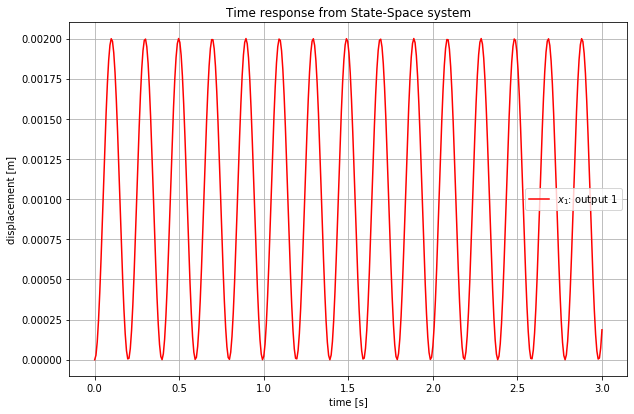

In [64]:
plt.figure(figsize=(10,6.5))
plt.plot(t1out,yout, 'r', label = r'$x_1$: output 1')
plt.xlabel('time [s]')
plt.ylabel('displacement [m]')
plt.legend()
plt.grid(True)
plt.title('Time response from State-Space system')
plt.show()

### Retreive the transferfunction form the State-Space system

In [51]:
tf1 = sys1.to_tf(input=0)
print('The transfer function is: ',tf1)

The transfer function is:  TransferFunctionContinuous(
array([1.]),
array([1.e+00, 0.e+00, 1.e+03]),
dt: None
)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


#### Transfer function in zpk mode

In [52]:
zpk1 = tf1.to_zpk()
print('The ZerosPolesGain model of the system is: ', zpk1)

The ZerosPolesGain model of the system is:  ZerosPolesGainContinuous(
array([], dtype=float64),
array([-0.+31.6227766j,  0.-31.6227766j]),
0.9999999999996589,
dt: None
)


Again check the poles with the eigenvalues of the A-matrix.

### Simulation from an initial condition $F_{in} =$ 50 [N] to 0 [N] at $t=0$.

In [57]:
u1 = 2*np.zeros_like(t1)
init = [0, 50]
tout1, y1, x1 = sig.lsim(tf1, u1, t1, X0=init)

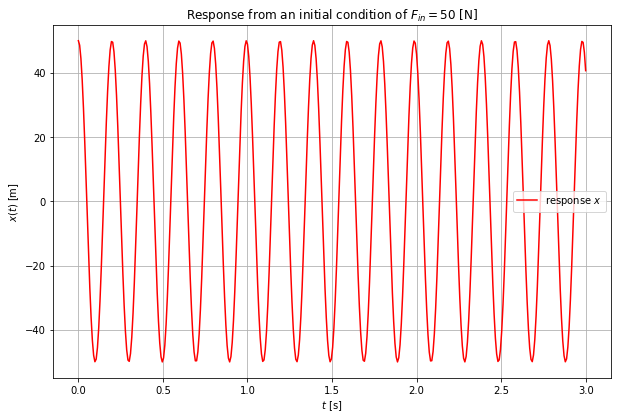

In [61]:
plt.figure(figsize=(10,6.5))
plt.plot(tout1, y1, 'r', label=r'response $x$')
plt.xlabel (r'$t$ [s]')
plt.ylabel (r'$x(t)$ [m]')
plt.title(r'Response from an initial condition of $F_{in} = 50$ [N]')
plt.legend()
plt.grid(True)
plt.show()

Check the results